### Задача.

Провести ряд экспериментов с архитектурой нейронных сетей.
1. Исследовать влияние количества слоев conv2_d.
2. Исследовать влияние количества нейронов.
3. Исследовать влияние MaxPooling2D в сети.
4. Исследовать влияние Dropout.
5. Написать выводы по результатам проведенных тестов.

In [0]:
# времени на этой неделе мало, но мне важно выполнять задания в полном объеме. 
# Поэтому, извините, в этот раз весьма формально. Но полагаю все выполнено.

In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras import utils
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -q "/content/drive/My Drive/middle_fmr.zip" -d /content/cars #Указываем путь к базе в Google Drive

In [0]:
train_path = '/content/cars'
batch_size = 25
img_width = 96
img_height = 54

In [0]:
datagen = ImageDataGenerator(
    rescale = 1. / 255, # change color on fractional
    rotation_range=10, # turn on generation
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split = 0.2
)

In [0]:
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

Found 2743 images belonging to 3 classes.
Found 684 images belonging to 3 classes.


In [0]:
# baseline
model = Sequential()
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=70,
    verbose=1)

Epoch 1/70
109/109 [==============================] - 14s 126ms/step - loss: 0.9890 - accuracy: 0.4823 - val_loss: 0.9440 - val_accuracy: 0.4859
Epoch 2/70
109/109 [==============================] - 13s 122ms/step - loss: 0.9024 - accuracy: 0.5408 - val_loss: 0.9314 - val_accuracy: 0.5081
Epoch 3/70
109/109 [==============================] - 14s 125ms/step - loss: 0.9020 - accuracy: 0.5497 - val_loss: 0.9276 - val_accuracy: 0.5422
Epoch 4/70
109/109 [==============================] - 14s 133ms/step - loss: 0.8835 - accuracy: 0.5640 - val_loss: 0.9420 - val_accuracy: 0.5422
Epoch 5/70
109/109 [==============================] - 14s 124ms/step - loss: 0.8684 - accuracy: 0.5725 - val_loss: 0.9968 - val_accuracy: 0.5348
Epoch 6/70
109/109 [==============================] - 14s 126ms/step - loss: 0.8505 - accuracy: 0.6001 - val_loss: 0.9290 - val_accuracy: 0.5126
Epoch 7/70
109/109 [==============================] - 13s 123ms/step - loss: 0.8552 - accuracy: 0.6060 - val_loss: 0.9068 - val_ac

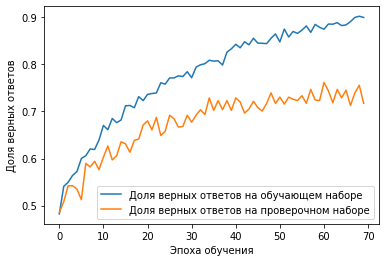

In [0]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [0]:
# 75% с хвостиком при такой архитектуре потолок

In [0]:
# add two conv2D
model1 = Sequential()
model1.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model1.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(3, 3)))
model1.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model1.add(Dropout(0.2))
model1.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(3, 3)))
model1.add(Dropout(0.2))
model1.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model1.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(3, 3)))
model1.add(Dropout(0.2))
model1.add(Flatten())

model1.add(Dense(2048, activation='relu'))
model1.add(Dense(4096, activation='relu'))
model1.add(Dense(len(train_generator.class_indices), activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = model1.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=70,
    verbose=1
)

Epoch 1/70
109/109 [==============================] - 24s 222ms/step - loss: 1.1504 - accuracy: 0.3366 - val_loss: 1.0655 - val_accuracy: 0.4074
Epoch 2/70
109/109 [==============================] - 24s 222ms/step - loss: 1.1022 - accuracy: 0.3499 - val_loss: 1.1020 - val_accuracy: 0.3437
Epoch 3/70
109/109 [==============================] - 24s 218ms/step - loss: 1.0784 - accuracy: 0.3929 - val_loss: 0.9998 - val_accuracy: 0.4741
Epoch 4/70
109/109 [==============================] - 24s 216ms/step - loss: 0.9601 - accuracy: 0.5055 - val_loss: 0.9443 - val_accuracy: 0.5215
Epoch 5/70
109/109 [==============================] - 24s 217ms/step - loss: 0.9206 - accuracy: 0.5272 - val_loss: 0.9526 - val_accuracy: 0.5081
Epoch 6/70
109/109 [==============================] - 23s 215ms/step - loss: 0.9091 - accuracy: 0.5335 - val_loss: 0.9571 - val_accuracy: 0.5141
Epoch 7/70
109/109 [==============================] - 23s 215ms/step - loss: 0.9061 - accuracy: 0.5412 - val_loss: 0.9466 - val_ac

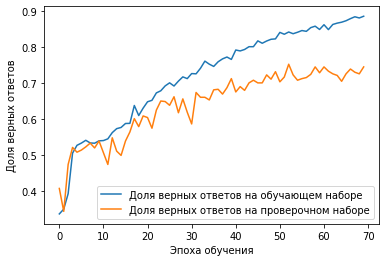

In [0]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [0]:
# странно, но результат даже похуже

In [0]:
# снизим количество нейронов вдвое
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=70,
    verbose=1
)

Epoch 1/70
109/109 [==============================] - 14s 130ms/step - loss: 1.0894 - accuracy: 0.4165 - val_loss: 0.9757 - val_accuracy: 0.4874
Epoch 2/70
109/109 [==============================] - 13s 117ms/step - loss: 0.9282 - accuracy: 0.5287 - val_loss: 1.0371 - val_accuracy: 0.5052
Epoch 3/70
109/109 [==============================] - 13s 120ms/step - loss: 0.9255 - accuracy: 0.5239 - val_loss: 0.9675 - val_accuracy: 0.4919
Epoch 4/70
109/109 [==============================] - 13s 123ms/step - loss: 0.9159 - accuracy: 0.5283 - val_loss: 0.9315 - val_accuracy: 0.5185
Epoch 5/70
109/109 [==============================] - 13s 123ms/step - loss: 0.8917 - accuracy: 0.5493 - val_loss: 0.9519 - val_accuracy: 0.5096
Epoch 6/70
109/109 [==============================] - 13s 119ms/step - loss: 0.8899 - accuracy: 0.5611 - val_loss: 0.9495 - val_accuracy: 0.5052
Epoch 7/70
109/109 [==============================] - 13s 116ms/step - loss: 0.8816 - accuracy: 0.5570 - val_loss: 0.9474 - val_ac

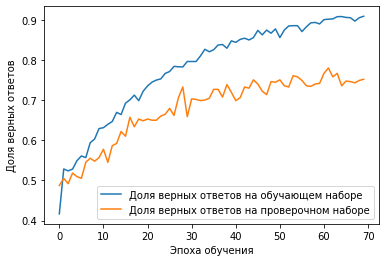

In [0]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [0]:
# не впечатляет)

In [0]:
# delete maxpool layers and lower count neuron in Dense-layers
# because memory problem
model = Sequential()
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(148, activation='relu'))
model.add(Dense(96, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=70,
    verbose=1
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/70
109/109 [==============================] - 61s 562ms/step - loss: 1.4514 - accuracy: 0.3503 - val_loss: 1.0981 - val_accuracy: 0.3437
Epoch 2/70
109/109 [==============================] - 60s 554ms/step - loss: 1.0581 - accuracy: 0.4025 - val_loss: 0.9526 - val_accuracy: 0.5067
Epoch 3/70
109/109 [==============================] - 61s 556ms/step - loss: 0.9382 - accuracy: 0.5313 - val_loss: 0.9430 - val_accuracy: 0.5259
Epoch 4/70
109/109 [==============================] - 61s 556ms/step - loss: 0.8934 - accuracy: 0.5655 - val_loss: 0.9656 - val_accuracy: 0.5111
Epoch 5/70
109/109 [==============================] - 61s 556ms/step - loss: 0.8904 - accuracy: 0.5688 - val_loss: 0.9655 - val_accuracy: 0.4904
Epoch 6/70
109/109 [==============================] - 61s 557ms/step - loss: 0.8863 - accuracy: 0.5681 - val_loss: 0.9423 - val_accuracy: 0.5259
Epoch 7/70
109/109 [==============================] - 

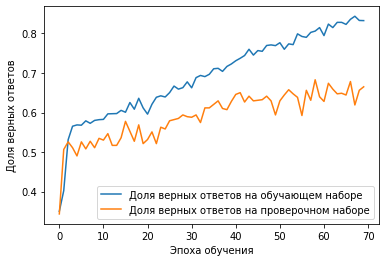

In [0]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [0]:
# ну этого и следовало ожидать

In [0]:
# delete dropout layers
model = Sequential()
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=70,
    verbose=1
)

Epoch 1/70
109/109 [==============================] - 24s 222ms/step - loss: 1.0634 - accuracy: 0.4198 - val_loss: 0.9534 - val_accuracy: 0.4756
Epoch 2/70
109/109 [==============================] - 24s 216ms/step - loss: 0.9404 - accuracy: 0.5173 - val_loss: 0.9476 - val_accuracy: 0.5007
Epoch 3/70
109/109 [==============================] - 23s 213ms/step - loss: 0.9186 - accuracy: 0.5335 - val_loss: 0.9428 - val_accuracy: 0.5230
Epoch 4/70
109/109 [==============================] - 23s 215ms/step - loss: 0.9078 - accuracy: 0.5280 - val_loss: 0.9419 - val_accuracy: 0.5141
Epoch 5/70
109/109 [==============================] - 23s 215ms/step - loss: 0.8958 - accuracy: 0.5574 - val_loss: 0.9741 - val_accuracy: 0.5333
Epoch 6/70
109/109 [==============================] - 23s 213ms/step - loss: 0.8868 - accuracy: 0.5497 - val_loss: 0.9303 - val_accuracy: 0.5141
Epoch 7/70
109/109 [==============================] - 24s 217ms/step - loss: 0.8861 - accuracy: 0.5611 - val_loss: 0.9449 - val_ac

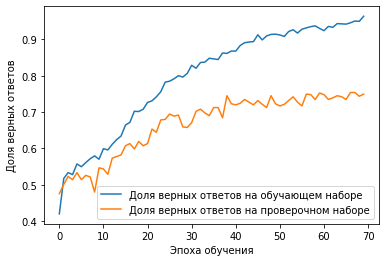

In [0]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# Итоги.

1. Количество слоев положительно не отразилось. 
2. Уменьшение нейронов дало негативный результат.
3. Убирание слоев дропаута предсказуемо ухудшило результат.
4. C макспулом вообще все сложно, возникли проблемы с памятью, пришлось сильно менять всю нейронку и это дало плохие результаты. Это важный слой при работе с изображениями. 